### K-means Clustering Algorithm Implementation without sklearn

#### What is K-means clustering?
K-means clustering is a popular unsupervised learning algorithm. It is used to split N observations into K clusters with similar characteristics. 

The value of 'K', i.e. the number of clusters must be chosen carefully to attain optimum K-means performance. A lot of times the value of K can be the number of classes that exist in the dataset, but it varies based on the features we choose to take as input. 

For example:
- In a dataset about animals, if we only take height and neck length as the input features then _horse_ and _zebra_ might be classified under the same class
- If the color of the skin of the animal is also used as an additional feature, then the animals may be separable.

Hence, the number of clusters might not always be equal to the number of classes. It depends on the input features. The number of clusters (K) is usually chosen based on 2 criteria:
- Inter-cluster separability 
- Intra-cluster similarity

The optimum value of K is chosen based on analysis using the Elbow method or Silhouette method which is not explored in the scope of this assignment.


##### K-means clustering assumptions:
1. Data is not skewed
2. Features have the same mean
3. Features have the same variance

##### Algorithm:
1. Set a value of **k** 
2. Choose random **k** data points as centroids
3. For each data point **x** in the dataset:
   - Measure Euclidean distance to the centroid and assign it to the nearest centroid
   - Recalulate the centroids as the mean of each cluster
   - Reassign data points to new centroids
   - Continue the above steps in centroids keep changing. If centroids no longer change, then stop

In [1]:
# Import all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Runtime Configuration Parameters for Matplotlib
plt.rcParams['font.family'] = 'Verdana'
# Set figure size in inches
plt.rcParams['figure.figsize'] = 10, 8

plt.style.use('ggplot')

In [2]:
# Read the data
iris_df = pd.read_csv('Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_df = iris_df.drop('Id', axis = 1)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


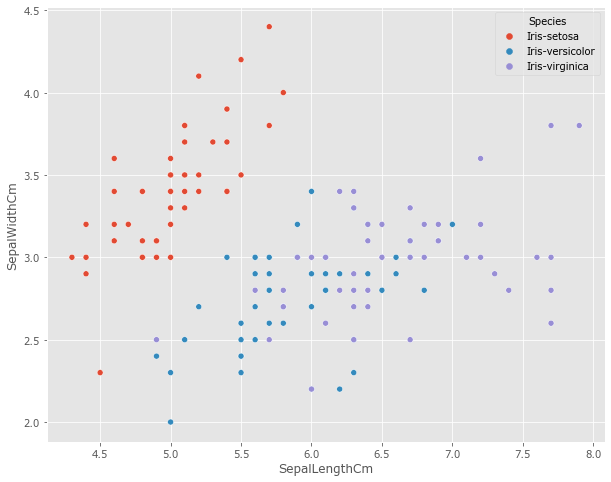

In [5]:
sns.scatterplot(data = iris_df, x = "SepalLengthCm", y = "SepalWidthCm", hue = "Species")

In [6]:
df = iris_df[['SepalLengthCm', 'SepalWidthCm']]
df.head(5)

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [7]:
# Initialize k
k = 2

In [8]:
# Choosing k data points as centroids for each cluster

def rand_centroid(df, k):
    # Random k indices from the dataframe df
    rand_centroid_idx = [np.random.randint(len(df)) for i in range(k)] # len(df) ==> no. of rows
    
    # Empty list for centroids
    centroids_initial = []
    
    for i in rand_centroid_idx:
        # Use datapoint at that index as centroid, append to centroids list
        centroids_initial.append(df.iloc[i]) 
        
    return centroids_initial

In [9]:
c = rand_centroid(df, k=2)
print(c)

[SepalLengthCm    6.4
SepalWidthCm     3.2
Name: 115, dtype: float64, SepalLengthCm    4.8
SepalWidthCm     3.4
Name: 11, dtype: float64]


In [10]:
# Assign data point to a cluster with shortest Euclidean distance from centroid
# Compare each data point to all 'k' centroids

def assign_to_cluster(df, centroids_initial, k):
    clusters = [] # Stores cluster number for each datapoint
    
    # For every datapoint in df, calculate distace from centroid
    for i in range(len(df)):
        # Empty list to store Euclidean distance
        euclidean_dist = []
        
        for j in range(k):
            diff = np.array(df.iloc[i]) - np.array(centroids_initial[j])
            euclidean_dist.append(np.linalg.norm(diff)) 
            
        # Append cluster's index the minimum distance to the data point
        cluster_index = np.argmin(euclidean_dist) 
        clusters.append(cluster_index) 
    return clusters

In [11]:
a = assign_to_cluster(df, c, k)
print(a)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
# Update centroid based on calculated mean 0f exsisting cluster

# For each cluster, check all associated datapoints in the dataframe, put in cluster_points list
# Calculate mean of cluster to get new centroid
# Add new centroid to new_centroid_list

def update_centroid(df, clusters, k):
    # Store list of updated centroids
    new_centroid_list = []
    
    for i in range(k):
        # Stores datapoints of cluster
        cluster_points = []
        
        for j in range(len(df)):
            
            # Compare cluster number for all datapoints
            # If cluster number for a datapoint is equal to cluster i, then add all datapoints with that cluster to cluster_points
            # Calculate mean for each cluster, generates new cluster
            
            if clusters[j] == i:
                cluster_points.append(df.iloc[j])
                
        new_cluster_mean = np.mean(cluster_points, axis = 0)
        new_centroid_list.append(new_cluster_mean) # New centroid based on mean
        
    return new_centroid_list        

In [13]:
u = update_centroid(df, a, k)
u

[array([6.35698925, 2.93010753]), array([5.00526316, 3.25614035])]

In [14]:
# We keep track of convergence by tracking the change in centroids
# Change is defined the current centroid and the updated centroid
# change_between_centroids should be approximately close to 0 to terminate

def change_centroids(current_cent, updated_cent):
    change = 0
    for i in range(len(current_cent)):
        change = np.linalg.norm(current_cent[i] - updated_cent[i])
    return change

In [15]:
# K-means algorithm implementation using the above functions

def k_means_algo(df, k):
    
    # Randomly assign centroid
    init_centroid = rand_centroid(df, k) 
    
    # Store change in centroids
    diff = 100 # Initialize
    
    # Keep updating centroid until diff is approximately 0
    while diff > 0.0001:
        clus = assign_to_cluster(df, init_centroid, k)
        new_centroid = update_centroid(df, clus, k)
        diff =  change_centroids(init_centroid, new_centroid)
        init_centroid = new_centroid
    
    # Final plot
    kmeans_plots( df, clus, new_centroid)
    return clus, init_centroid

In [16]:
# Plot
def kmeans_plots( df, clusters, new_centroid_list):
    # No. of clusters = No. of centroids
    cluster_colours = { 0: 'yellow', 1: 'deeppink', 2:'limegreen', 3:'blue', 4: 'steelblue', 5: 'crimson'}
    
    # All cluster scatterplot 
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set_xlabel("SepalLengthCm")
    ax.set_ylabel("SepalWidthCm")
    ax.set_title("K-means clusters for Iris dataset")
    
    for i in range(len(clusters)):
        ax.scatter(df.iloc[[i],[0]], df.iloc[[i],[1]], color = cluster_colours[clusters[i]]) 
        
    # Centroid marking
    for j in range(len(new_centroid_list)):
        ax.scatter(new_centroid_list[j][0], new_centroid_list[j][1], marker = '*', color = 'black', s=100)
    
    plt.show()

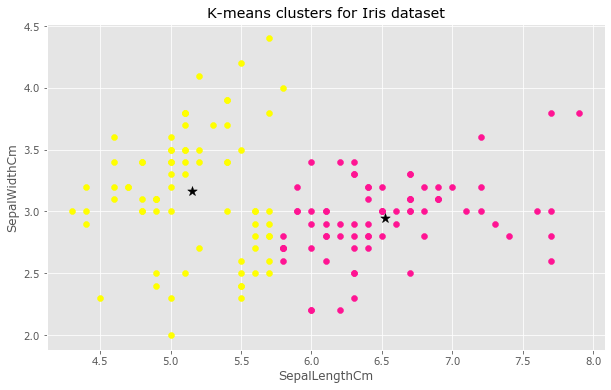

In [17]:
clusters, centroid = k_means_algo(df, k = 2)

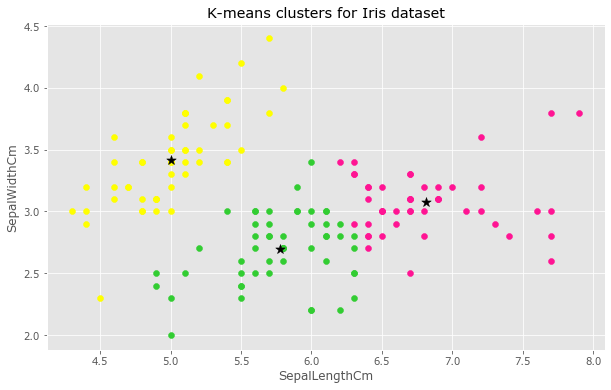

In [18]:
clusters, centroid = k_means_algo(df, k = 3)

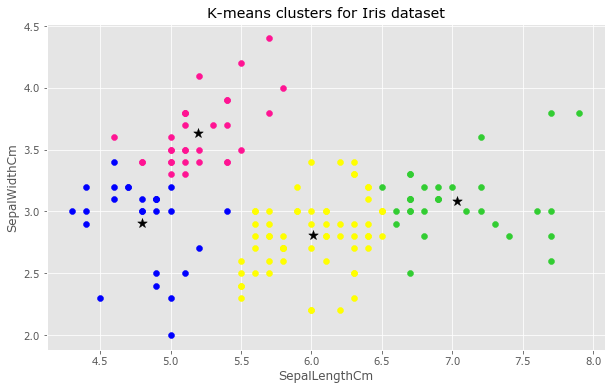

In [19]:
clusters, centroid = k_means_algo(df, k = 4)

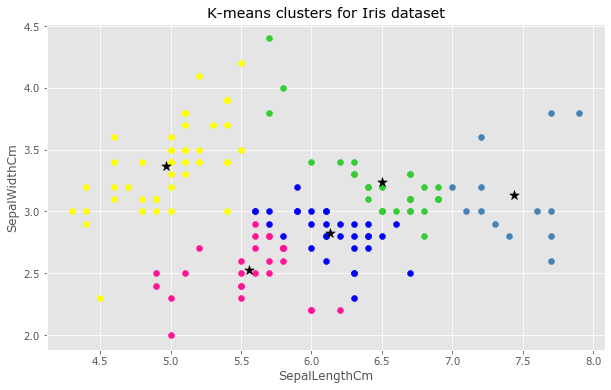

In [20]:
clusters, centroid = k_means_algo(df, k = 5)